# **Final Python Notebook 1**
* Author - C.M.M.S Silva
* IIT ID - 20230183
* UoW ID - w2053190
* Code Peer Reviewer - Pamodi Pansiluni

In [1]:
# import pandas library
import pandas as pd

In [2]:
# import numpy and other necessary libraries
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

In [3]:
# load the dataset
data = pd.read_csv('/content/drive/MyDrive/5DATA001C.2 Machine Learning and Data Mining/CW dataset/5DATA002W.2 Coursework Dataset(25012025v6.0).csv')
print(data.head())

  Patient_ID  Month_of_Birth   Age     Sex   Occupation T_Stage N_Stage  \
0      A0012              12  68.0  Female     Teaching      T1      N1   
1      A0013              12  50.0  Female      Medical      T2      N2   
2      A0014              11  58.0  Female  Engineering      T3      N3   
3      A0015               3  58.0  Female   Technology      T1      N1   
4      A0016               1  47.0  Female   Multimedia      T2      N1   

  6th_Stage             Differentiated  Grade   A_Stage  Tumor_Size  \
0       IIA      Poorly differentiated      3  Regional         4.0   
1      IIIA  Moderately differentiated      2  Regional        35.0   
2      IIIC  Moderately differentiated      2  Regional        63.0   
3       IIA      Poorly differentiated      3  Regional        18.0   
4       IIB      Poorly differentiated      3  Regional        41.0   

  Estrogen_Status Progesterone_Status  Regional_Node_Examined  \
0        Positive            Positive                    

In [4]:
# Take the sum of the null values in each variable
print(data.isnull().sum())

Patient_ID                   0
Month_of_Birth               0
Age                          9
Sex                          4
Occupation                3981
T_Stage                      0
N_Stage                      0
6th_Stage                    0
Differentiated               0
Grade                        0
A_Stage                      0
Tumor_Size                   3
Estrogen_Status              0
Progesterone_Status          0
Regional_Node_Examined       1
Reginol_Node_Positive        0
Survival_Months              0
Mortality_Status             0
dtype: int64


In [5]:
# Drop certain Variables that are unwanted for Training and Analysing
data.drop(columns=['Occupation'], inplace=True)
data.drop(columns=['Patient_ID'], inplace=True)
data.drop(columns=['Month_of_Birth'], inplace=True)
print(data.isnull().sum())

Age                       9
Sex                       4
T_Stage                   0
N_Stage                   0
6th_Stage                 0
Differentiated            0
Grade                     0
A_Stage                   0
Tumor_Size                3
Estrogen_Status           0
Progesterone_Status       0
Regional_Node_Examined    1
Reginol_Node_Positive     0
Survival_Months           0
Mortality_Status          0
dtype: int64


In [6]:
# Print the data types
print(data.dtypes)

Age                       float64
Sex                        object
T_Stage                    object
N_Stage                    object
6th_Stage                  object
Differentiated             object
Grade                       int64
A_Stage                    object
Tumor_Size                float64
Estrogen_Status            object
Progesterone_Status        object
Regional_Node_Examined    float64
Reginol_Node_Positive       int64
Survival_Months             int64
Mortality_Status           object
dtype: object


In [7]:
# Describe the dataset
data.describe(include='all')

,Age,Sex,T_Stage,N_Stage,6th_Stage,Differentiated,Grade,A_Stage,Tumor_Size,Estrogen_Status,Progesterone_Status,Regional_Node_Examined,Reginol_Node_Positive,Survival_Months,Mortality_Status
count,4015.000000,4020,4024,4024,4024,4024,4024.000000,4024,4021.000000,4024,4024,4023.000000,4024.000000,4024.000000,4024
unique,NaN,2,4,3,5,4,NaN,2,NaN,2,2,NaN,NaN,NaN,7
top,NaN,Female,T2,N1,IIA,Moderately differentiated,NaN,Regional,NaN,Positive,Positive,NaN,NaN,NaN,Alive
freq,NaN,4001,1786,2732,1305,2351,NaN,3932,NaN,3755,3326,NaN,NaN,NaN,3399
mean,54.107098,NaN,NaN,NaN,NaN,NaN,2.150596,NaN,30.419299,NaN,NaN,14.373602,4.158052,71.472167,NaN
std,11.715528,NaN,NaN,NaN,NaN,NaN,0.638234,NaN,21.161080,NaN,NaN,8.129293,5.109331,25.361855,NaN
min,-50.000000,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,-75.000000,NaN,NaN,1.000000,1.000000,1.000000,NaN
25%,47.000000,NaN,NaN,NaN,NaN,NaN,2.000000,NaN,16.000000,NaN,NaN,9.000000,1.000000,56.000000,NaN
50%,54.000000,NaN,NaN,NaN,NaN,NaN,2.000000,NaN,25.000000,NaN,NaN,14.000000,2.000000,73.000000,NaN
75%,61.000000,NaN,NaN,NaN,NaN,NaN,3.000000,NaN,38.000000,NaN,NaN,19.000000,5.000000,90.000000,NaN


In [8]:
# Print data to see variables with null values
print(data.isnull().sum())

Age                       9
Sex                       4
T_Stage                   0
N_Stage                   0
6th_Stage                 0
Differentiated            0
Grade                     0
A_Stage                   0
Tumor_Size                3
Estrogen_Status           0
Progesterone_Status       0
Regional_Node_Examined    1
Reginol_Node_Positive     0
Survival_Months           0
Mortality_Status          0
dtype: int64


In [9]:
# Replace the numerical null values with mean
numerical_cols = data.select_dtypes(include=['int64', 'float64']).columns
imputer = SimpleImputer(strategy='mean')
data[numerical_cols] = imputer.fit_transform(data[numerical_cols])
# Replace the categorical null values with mode
categorical_cols = data.select_dtypes(include=['object']).columns
imputer = SimpleImputer(strategy='most_frequent')
data[categorical_cols] = imputer.fit_transform(data[categorical_cols])
# Print the data again
print(data.isnull().sum())

Age                       0
Sex                       0
T_Stage                   0
N_Stage                   0
6th_Stage                 0
Differentiated            0
Grade                     0
A_Stage                   0
Tumor_Size                0
Estrogen_Status           0
Progesterone_Status       0
Regional_Node_Examined    0
Reginol_Node_Positive     0
Survival_Months           0
Mortality_Status          0
dtype: int64


In [10]:
# Check if there's any rows with duplicated values
print(data.duplicated().sum())

1


In [11]:
# Drop the duplicates
data.drop_duplicates(inplace=True)

In [12]:
# Check for any duplicates after dropping
print(data.duplicated().sum())

0


In [13]:
# Check for any column with negative numerical values
for col in numerical_cols:
    negative_values = data[data[col] < 0]
    if not negative_values.empty:
        print(f"Negative values found in column '{col}':")
        print(negative_values[[col]])
        print("-" * 20)

Negative values found in column 'Age':
      Age
212 -50.0
--------------------
Negative values found in column 'Tumor_Size':
     Tumor_Size
210       -75.0
--------------------


In [14]:
# Replace the negative numerical values with mean of positive numerical values
for col in numerical_cols:
    positive_values = data[data[col] >= 0][col]
    if not positive_values.empty:
      mean_positive = positive_values.mean()
      data.loc[data[col] < 0, col] = mean_positive

In [15]:
# Check again for negative values
for col in numerical_cols:
    negative_values = data[data[col] < 0]
    if negative_values.empty:
        print(f"No negative values found in column '{col}'")
    else:
        print(f"Negative values found in column '{col}':")
        print(negative_values[[col]])
        print("-" * 20)

No negative values found in column 'Age'
No negative values found in column 'Grade'
No negative values found in column 'Tumor_Size'
No negative values found in column 'Regional_Node_Examined'
No negative values found in column 'Reginol_Node_Positive'
No negative values found in column 'Survival_Months'


In [16]:
# Use df
df=data

In [17]:
# Describe the data
print(df.describe())

               Age        Grade   Tumor_Size  Regional_Node_Examined  \
count  4023.000000  4023.000000  4023.000000             4023.000000   
mean     54.130772     2.150634    30.448846               14.374938   
std      11.587304     0.638309    21.089331                8.128851   
min      30.000000     1.000000     1.000000                1.000000   
25%      47.000000     2.000000    16.000000                9.000000   
50%      54.000000     2.000000    25.000000               14.000000   
75%      61.000000     3.000000    38.000000               19.000000   
max     502.000000     4.000000   140.000000               61.000000   

       Reginol_Node_Positive  Survival_Months  
count            4023.000000      4023.000000  
mean                4.158837        71.476013  
std                 5.109724        25.363834  
min                 1.000000         1.000000  
25%                 1.000000        56.000000  
50%                 2.000000        73.000000  
75%            

In [18]:
# Shape of the dataset
print(df.shape)

(4023, 15)


In [19]:
# Retained feature's names
df.columns

Index(['Age', 'Sex', 'T_Stage', 'N_Stage', '6th_Stage', 'Differentiated',
       'Grade', 'A_Stage', 'Tumor_Size', 'Estrogen_Status',
       'Progesterone_Status', 'Regional_Node_Examined',
       'Reginol_Node_Positive', 'Survival_Months', 'Mortality_Status'],
      dtype='object')

In [20]:
# Use wisker function to calculate upper and lower bounds for detecting outliers using Interquartile Range (IQR)
def wisker(col):
  q1,q3=np.percentile(col,[25,75])
  iqr=q3-q1
  upper_bound=q3+(1.5*iqr)
  lower_bound=q1-(1.5*iqr)
  return upper_bound,lower_bound

In [21]:
# Remove rows with missing values
df.dropna(inplace=True)

In [22]:
# Print the upper and lower bounds for outliers in the 'Tumor_Size' column
wisker(df['Tumor_Size'])

(np.float64(71.0), np.float64(-17.0))

In [23]:
# Calculate upper and lower bound values for each column and replace outliers with them
for i in ['Tumor_Size','Age','Regional_Node_Examined','Reginol_Node_Positive','Survival_Months']:
  upper_bound,lower_bound=wisker(df[i])
  df[i]=np.where(df[i]>upper_bound,upper_bound,df[i])
  df[i]=np.where(df[i]<lower_bound,lower_bound,df[i])

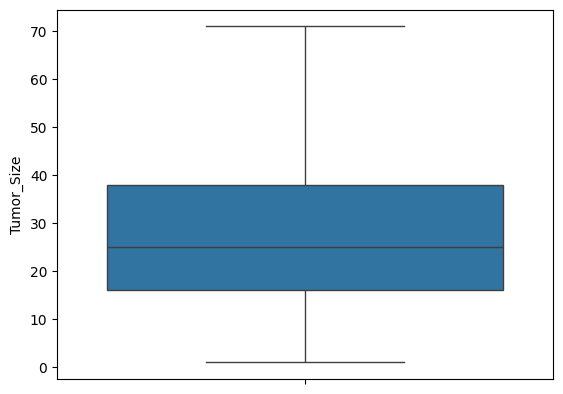

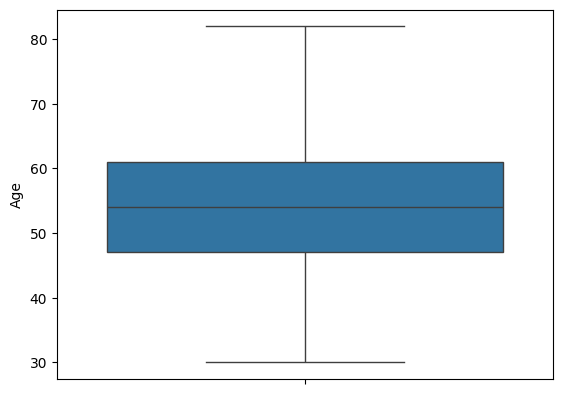

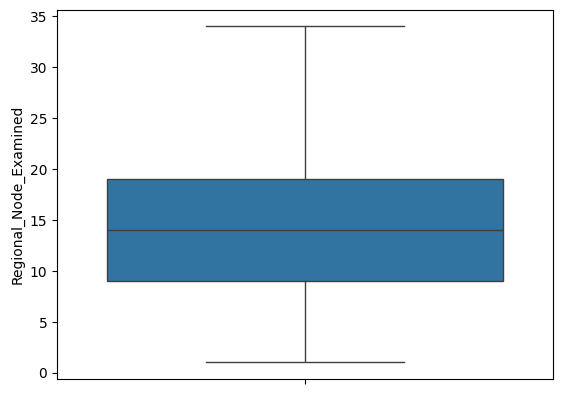

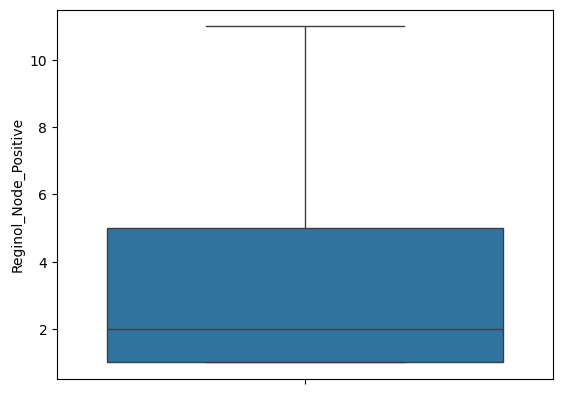

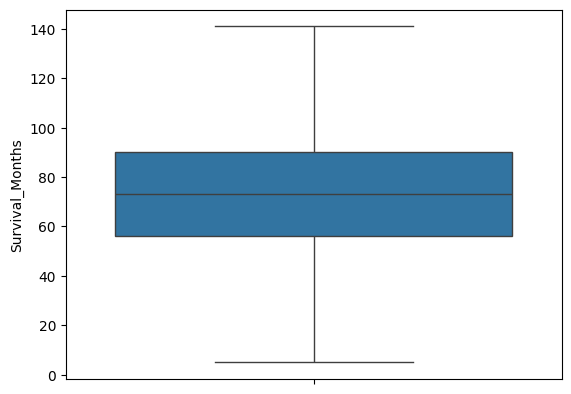

In [24]:
# Display box plots to visualize outlier removal
import seaborn as sns
import matplotlib.pyplot as plt
for i in ['Tumor_Size','Age','Regional_Node_Examined','Reginol_Node_Positive','Survival_Months']:
  sns.boxplot(df[i])
  plt.show()

In [25]:
df.isnull().sum()

,0
Age,0
Sex,0
T_Stage,0
N_Stage,0
6th_Stage,0
Differentiated,0
Grade,0
A_Stage,0
Tumor_Size,0
Estrogen_Status,0


In [26]:
print(df.dtypes)

Age                       float64
Sex                        object
T_Stage                    object
N_Stage                    object
6th_Stage                  object
Differentiated             object
Grade                     float64
A_Stage                    object
Tumor_Size                float64
Estrogen_Status            object
Progesterone_Status        object
Regional_Node_Examined    float64
Reginol_Node_Positive     float64
Survival_Months           float64
Mortality_Status           object
dtype: object


In [27]:
# Value counts in dataset
for col in df.select_dtypes(include=['object']).columns:
    print(df[col].value_counts())

Sex
Female    4004
1           19
Name: count, dtype: int64
T_Stage
T2    1786
T1    1602
T3     533
T4     102
Name: count, dtype: int64
N_Stage
N1    2731
N2     820
N3     472
Name: count, dtype: int64
6th_Stage
IIA     1304
IIB     1130
IIIA    1050
IIIC     472
IIIB      67
Name: count, dtype: int64
Differentiated
Moderately differentiated    2350
Poorly differentiated        1111
Well differentiated           543
Undifferentiated               19
Name: count, dtype: int64
A_Stage
Regional    3931
Distant       92
Name: count, dtype: int64
Estrogen_Status
Positive    3754
Negative     269
Name: count, dtype: int64
Progesterone_Status
Positive    3325
Negative     698
Name: count, dtype: int64
Mortality_Status
Alive    3398
Dead      598
DEAD       10
dead        8
ALIVE       5
alive       3
ALive       1
Name: count, dtype: int64


In [28]:
# Describe dataset
print(df.describe())

               Age        Grade   Tumor_Size  Regional_Node_Examined  \
count  4023.000000  4023.000000  4023.000000             4023.000000   
mean     54.000272     2.150634    29.329283               14.239466   
std       8.984103     0.638309    17.736951                7.677851   
min      30.000000     1.000000     1.000000                1.000000   
25%      47.000000     2.000000    16.000000                9.000000   
50%      54.000000     2.000000    25.000000               14.000000   
75%      61.000000     3.000000    38.000000               19.000000   
max      82.000000     4.000000    71.000000               34.000000   

       Reginol_Node_Positive  Survival_Months  
count            4023.000000      4023.000000  
mean                3.568481        71.329853  
std                 3.281311        22.925849  
min                 1.000000         5.000000  
25%                 1.000000        56.000000  
50%                 2.000000        73.000000  
75%            

In [29]:
# Handles invalid Tumor sizes like negative values treating them as missing values
df['Tumor_Size'] = df['Tumor_Size'].apply(lambda x: x if x >= 0 else None)

In [30]:
for i in ["Age","Tumor_Size","Regional_Node_Examined"]:
  df[i].fillna(df[i].median())

In [31]:
# Replaces missing NaN values with mode of "sex" column
df['Sex'].fillna(df['Sex'].mode()[0])

,Sex
0,Female
1,Female
2,Female
3,Female
4,Female
...,...
4019,Female
4020,Female
4021,1
4022,Female


In [32]:
# Fills all missing values with 0
df.fillna(0, inplace=True)

In [33]:
# Convert the data type of Grade and Sex into category data type
df['Grade'] = df['Grade'].astype('category')
df['Sex'] = df['Sex'].astype('category')

In [34]:
print(df.describe())

               Age   Tumor_Size  Regional_Node_Examined  \
count  4023.000000  4023.000000             4023.000000   
mean     54.000272    29.329283               14.239466   
std       8.984103    17.736951                7.677851   
min      30.000000     1.000000                1.000000   
25%      47.000000    16.000000                9.000000   
50%      54.000000    25.000000               14.000000   
75%      61.000000    38.000000               19.000000   
max      82.000000    71.000000               34.000000   

       Reginol_Node_Positive  Survival_Months  
count            4023.000000      4023.000000  
mean                3.568481        71.329853  
std                 3.281311        22.925849  
min                 1.000000         5.000000  
25%                 1.000000        56.000000  
50%                 2.000000        73.000000  
75%                 5.000000        90.000000  
max                11.000000       141.000000  


In [35]:
# Detects outliers in "Survival_Months" using IQR method with lower and upper bounds
Q1 = df['Survival_Months'].quantile(0.25)
Q3 = df['Survival_Months'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [36]:
df = df[(df['Survival_Months'] >= lower_bound) & (df['Survival_Months'] <= upper_bound)]

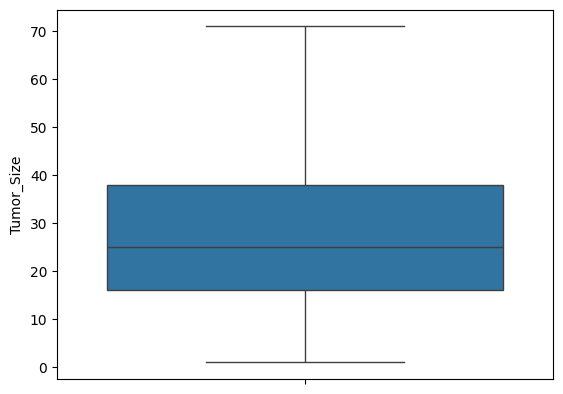

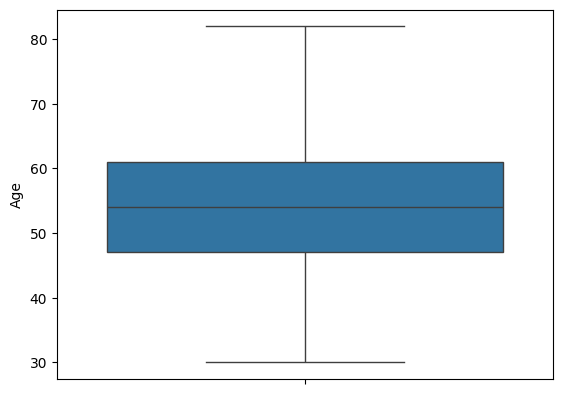

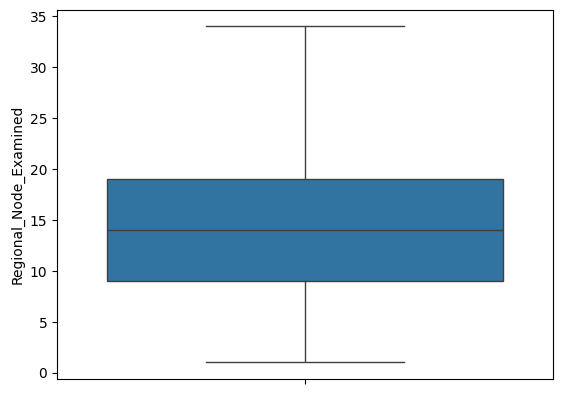

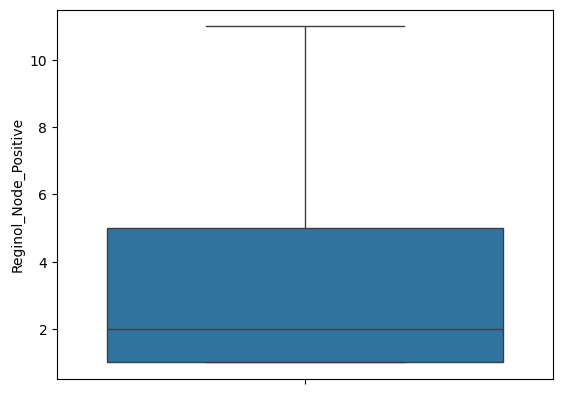

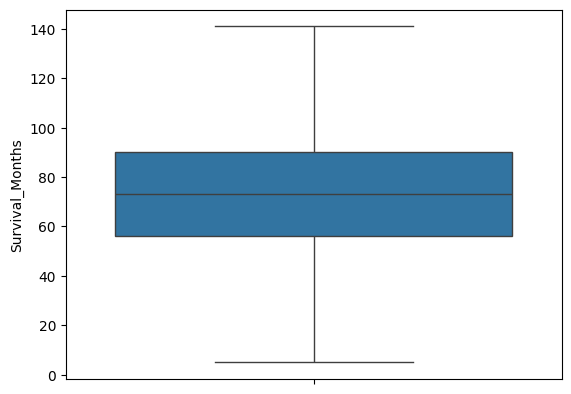

In [37]:
for i in ['Tumor_Size','Age','Regional_Node_Examined','Reginol_Node_Positive','Survival_Months']:
  sns.boxplot(df[i])
  plt.show()

In [38]:
print(df.isna().sum())

Age                       0
Sex                       0
T_Stage                   0
N_Stage                   0
6th_Stage                 0
Differentiated            0
Grade                     0
A_Stage                   0
Tumor_Size                0
Estrogen_Status           0
Progesterone_Status       0
Regional_Node_Examined    0
Reginol_Node_Positive     0
Survival_Months           0
Mortality_Status          0
dtype: int64


In [39]:
print((df[['Tumor_Size', 'Age', 'Regional_Node_Examined', 'Survival_Months']] < 0).sum())

Tumor_Size                0
Age                       0
Regional_Node_Examined    0
Survival_Months           0
dtype: int64


In [40]:
Q1 = df[['Age', 'Tumor_Size', 'Regional_Node_Examined', 'Survival_Months']].quantile(0.25)
Q3 = df[['Age', 'Tumor_Size', 'Regional_Node_Examined', 'Survival_Months']].quantile(0.75)
IQR = Q3 - Q1

outliers = ((df[['Age', 'Tumor_Size', 'Regional_Node_Examined', 'Survival_Months']] < (Q1 - 1.5 * IQR)) |
            (df[['Age', 'Tumor_Size', 'Regional_Node_Examined', 'Survival_Months']] > (Q3 + 1.5 * IQR)))

print(outliers.sum())

Age                       0
Tumor_Size                0
Regional_Node_Examined    0
Survival_Months           0
dtype: int64


In [41]:
print(df['Grade'].isna().sum())

0


In [42]:
df['Grade'] = df['Grade'].astype(int)

In [43]:
print(df.describe())

               Age        Grade   Tumor_Size  Regional_Node_Examined  \
count  4023.000000  4023.000000  4023.000000             4023.000000   
mean     54.000272     2.150634    29.329283               14.239466   
std       8.984103     0.638309    17.736951                7.677851   
min      30.000000     1.000000     1.000000                1.000000   
25%      47.000000     2.000000    16.000000                9.000000   
50%      54.000000     2.000000    25.000000               14.000000   
75%      61.000000     3.000000    38.000000               19.000000   
max      82.000000     4.000000    71.000000               34.000000   

       Reginol_Node_Positive  Survival_Months  
count            4023.000000      4023.000000  
mean                3.568481        71.329853  
std                 3.281311        22.925849  
min                 1.000000         5.000000  
25%                 1.000000        56.000000  
50%                 2.000000        73.000000  
75%            

In [44]:
print((df[['Age', 'Tumor_Size', 'Regional_Node_Examined', 'Reginol_Node_Positive', 'Survival_Months']] < 0).sum())

print(df['Sex'].unique())
print(df['Mortality_Status'].unique())

Age                       0
Tumor_Size                0
Regional_Node_Examined    0
Reginol_Node_Positive     0
Survival_Months           0
dtype: int64
['Female', '1']
Categories (2, object): ['1', 'Female']
['Alive' 'Dead' 'ALIVE' 'DEAD' 'ALive' 'alive' 'dead']


In [45]:
print(df[['Age', 'Tumor_Size', 'Regional_Node_Examined', 'Reginol_Node_Positive', 'Survival_Months']].describe())

               Age   Tumor_Size  Regional_Node_Examined  \
count  4023.000000  4023.000000             4023.000000   
mean     54.000272    29.329283               14.239466   
std       8.984103    17.736951                7.677851   
min      30.000000     1.000000                1.000000   
25%      47.000000    16.000000                9.000000   
50%      54.000000    25.000000               14.000000   
75%      61.000000    38.000000               19.000000   
max      82.000000    71.000000               34.000000   

       Reginol_Node_Positive  Survival_Months  
count            4023.000000      4023.000000  
mean                3.568481        71.329853  
std                 3.281311        22.925849  
min                 1.000000         5.000000  
25%                 1.000000        56.000000  
50%                 2.000000        73.000000  
75%                 5.000000        90.000000  
max                11.000000       141.000000  


In [46]:
print(df['Sex'].value_counts())
print(df['Mortality_Status'].value_counts())

Sex
Female    4004
1           19
Name: count, dtype: int64
Mortality_Status
Alive    3398
Dead      598
DEAD       10
dead        8
ALIVE       5
alive       3
ALive       1
Name: count, dtype: int64


In [47]:
df['Sex'] = df['Sex'].replace({'1': 'Male'})

<ipython-input-47-6b0ddb0453ed>:1: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  df['Sex'] = df['Sex'].replace({'1': 'Male'})


In [48]:
df['Mortality_Status'] = df['Mortality_Status'].str.capitalize()  # Capitalize first letter
df['Mortality_Status'] = df['Mortality_Status'].replace({
    'Alive': 'Alive',
    'Dead': 'Dead',
    'ALIVE': 'Alive',
    'DEAD': 'Dead',
    'ALive': 'Alive',
    'alive': 'Alive',
    'dead': 'Dead'
})

In [49]:
print(df['Sex'].unique())
print(df['Mortality_Status'].unique())

['Female', 'Male']
Categories (2, object): ['Male', 'Female']
['Alive' 'Dead']


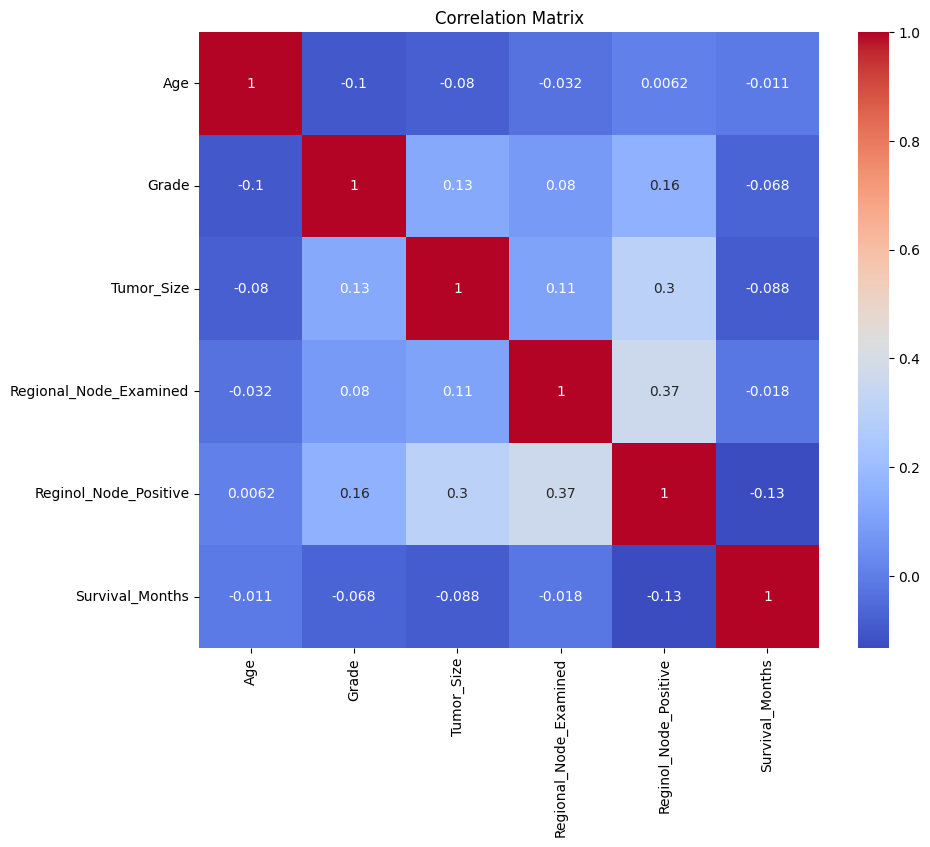

In [50]:
corr_matrix = df[numerical_cols].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

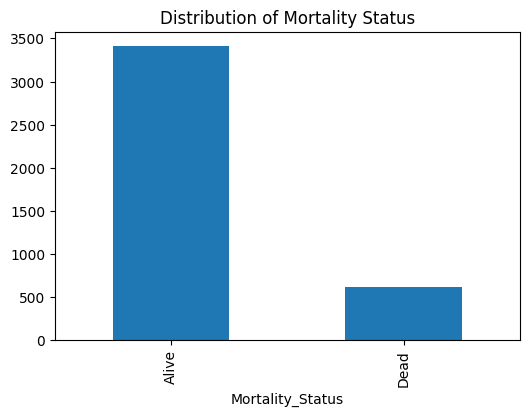

In [51]:
plt.figure(figsize=(6, 4))
df['Mortality_Status'].value_counts().plot(kind='bar')
plt.title('Distribution of Mortality Status')
plt.show()

In [52]:
df[numerical_cols].describe().T[['min', 'max']]

,min,max
Age,30.0,82.0
Grade,1.0,4.0
Tumor_Size,1.0,71.0
Regional_Node_Examined,1.0,34.0
Reginol_Node_Positive,1.0,11.0
Survival_Months,5.0,141.0


In [53]:
from sklearn.preprocessing import MinMaxScaler

features_to_normalize = ['Age', 'Grade', 'Tumor_Size',
                         'Regional_Node_Examined', 'Reginol_Node_Positive',
                         'Survival_Months']

scaler = MinMaxScaler()
df[features_to_normalize] = scaler.fit_transform(df[features_to_normalize])

In [54]:
print(df[['Sex', 'Mortality_Status']].dtypes)

Sex                 category
Mortality_Status      object
dtype: object


In [55]:
df.to_csv('cleaned_dataset.csv', index=False)

In [56]:
loaded_df = pd.read_csv('cleaned_dataset.csv')

print(loaded_df.head())
print(loaded_df.info())

        Age     Sex T_Stage N_Stage 6th_Stage             Differentiated  \
0  0.730769  Female      T1      N1       IIA      Poorly differentiated   
1  0.384615  Female      T2      N2      IIIA  Moderately differentiated   
2  0.538462  Female      T3      N3      IIIC  Moderately differentiated   
3  0.538462  Female      T1      N1       IIA      Poorly differentiated   
4  0.326923  Female      T2      N1       IIB      Poorly differentiated   

      Grade   A_Stage  Tumor_Size Estrogen_Status Progesterone_Status  \
0  0.666667  Regional    0.042857        Positive            Positive   
1  0.333333  Regional    0.485714        Positive            Positive   
2  0.333333  Regional    0.885714        Positive            Positive   
3  0.666667  Regional    0.242857        Positive            Positive   
4  0.666667  Regional    0.571429        Positive            Positive   

   Regional_Node_Examined  Reginol_Node_Positive  Survival_Months  \
0                0.696970          

In [57]:
import pandas as pd

df = pd.read_csv('cleaned_dataset.csv')

In [58]:
# Create the classification dataset
classification_df = df.drop(columns=['Survival_Months'])

classification_df['Mortality_Status'] = classification_df['Mortality_Status'].map({'Alive': 0, 'Dead': 1})

print(classification_df.head())
print(classification_df['Mortality_Status'].value_counts())

        Age     Sex T_Stage N_Stage 6th_Stage             Differentiated  \
0  0.730769  Female      T1      N1       IIA      Poorly differentiated   
1  0.384615  Female      T2      N2      IIIA  Moderately differentiated   
2  0.538462  Female      T3      N3      IIIC  Moderately differentiated   
3  0.538462  Female      T1      N1       IIA      Poorly differentiated   
4  0.326923  Female      T2      N1       IIB      Poorly differentiated   

      Grade   A_Stage  Tumor_Size Estrogen_Status Progesterone_Status  \
0  0.666667  Regional    0.042857        Positive            Positive   
1  0.333333  Regional    0.485714        Positive            Positive   
2  0.333333  Regional    0.885714        Positive            Positive   
3  0.666667  Regional    0.242857        Positive            Positive   
4  0.666667  Regional    0.571429        Positive            Positive   

   Regional_Node_Examined  Reginol_Node_Positive  Mortality_Status  
0                0.696970          

In [59]:
# Create the regression dataset
regression_df = df.drop(columns=['Mortality_Status'])

print(regression_df.head())
print(regression_df['Survival_Months'].describe())

        Age     Sex T_Stage N_Stage 6th_Stage             Differentiated  \
0  0.730769  Female      T1      N1       IIA      Poorly differentiated   
1  0.384615  Female      T2      N2      IIIA  Moderately differentiated   
2  0.538462  Female      T3      N3      IIIC  Moderately differentiated   
3  0.538462  Female      T1      N1       IIA      Poorly differentiated   
4  0.326923  Female      T2      N1       IIB      Poorly differentiated   

      Grade   A_Stage  Tumor_Size Estrogen_Status Progesterone_Status  \
0  0.666667  Regional    0.042857        Positive            Positive   
1  0.333333  Regional    0.485714        Positive            Positive   
2  0.333333  Regional    0.885714        Positive            Positive   
3  0.666667  Regional    0.242857        Positive            Positive   
4  0.666667  Regional    0.571429        Positive            Positive   

   Regional_Node_Examined  Reginol_Node_Positive  Survival_Months  
0                0.696970           

In [60]:
# Save the classification dataset
classification_df.to_csv('/content/drive/MyDrive/Colab Notebooks/classification_dataset.csv', index=False)

# Save the regression dataset
regression_df.to_csv('/content/drive/MyDrive/Colab Notebooks/regression_dataset.csv', index=False)

In [63]:
classification_df_loaded = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/classification_dataset.csv')
print(classification_df_loaded.head())
print("----------"*10)

regression_df_loaded = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/regression_dataset.csv')
print(regression_df_loaded.head())

        Age     Sex T_Stage N_Stage 6th_Stage             Differentiated  \
0  0.730769  Female      T1      N1       IIA      Poorly differentiated   
1  0.384615  Female      T2      N2      IIIA  Moderately differentiated   
2  0.538462  Female      T3      N3      IIIC  Moderately differentiated   
3  0.538462  Female      T1      N1       IIA      Poorly differentiated   
4  0.326923  Female      T2      N1       IIB      Poorly differentiated   

      Grade   A_Stage  Tumor_Size Estrogen_Status Progesterone_Status  \
0  0.666667  Regional    0.042857        Positive            Positive   
1  0.333333  Regional    0.485714        Positive            Positive   
2  0.333333  Regional    0.885714        Positive            Positive   
3  0.666667  Regional    0.242857        Positive            Positive   
4  0.666667  Regional    0.571429        Positive            Positive   

   Regional_Node_Examined  Reginol_Node_Positive  Mortality_Status  
0                0.696970          

In [64]:
df.to_csv('/content/drive/MyDrive/Colab Notebooks/final_preprocessed_data.csv', index=False)